In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
companies = pd.read_csv('companies_d.csv', encoding = "ISO-8859-1")
rounds = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1")

In [3]:
companies.head()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
companies['company_permalink'] = companies['company_permalink'].str.lower()

In [6]:
companies.head()
companies.shape

(18334, 10)

In [7]:
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
rounds.shape

(114949, 6)

In [9]:
master_frame_pre = pd.merge(companies, rounds, on='company_permalink', how='inner')
master_frame_pre.to_csv('merged_companies_rounds.csv')

In [10]:
df_merged = pd.read_csv('merged_companies_rounds.csv')
df_merged.head()

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
df_merged.shape

(32082, 16)

In [12]:
duplicate = df_merged.duplicated()
duplicate.to_csv('duplicate.csv')

In [13]:
df_merged['funding_round_type'] = df_merged['funding_round_type'].str.lower()
df_merged.head()

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [14]:
df_merged['funding_round_type'].value_counts().sort_values(ascending=False).head(10)

venture                15999
seed                    7966
debt_financing          2121
angel                   1516
undisclosed             1369
equity_crowdfunding      910
private_equity           654
grant                    623
convertible_note         504
post_ipo_equity          206
Name: funding_round_type, dtype: int64

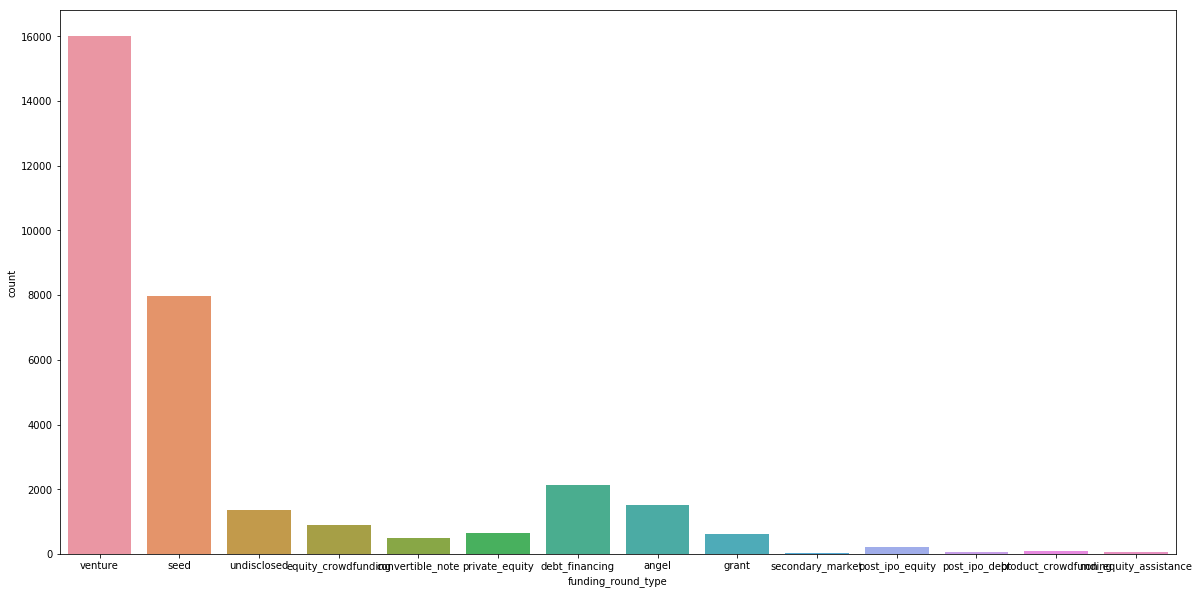

In [21]:
plt.figure(figsize = (20,10))
sns.countplot(df_merged['funding_round_type'])

In [22]:
df_merged.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False)

funding_round_type
venture                  1.660559e+11
private_equity           4.265228e+10
debt_financing           2.863777e+10
post_ipo_equity          2.856505e+10
undisclosed              9.944765e+09
post_ipo_debt            8.018193e+09
seed                     4.791158e+09
grant                    2.690026e+09
angel                    1.143716e+09
convertible_note         5.243080e+08
secondary_market         4.562362e+08
equity_crowdfunding      2.084155e+08
product_crowdfunding     1.419878e+08
non_equity_assistance    2.069153e+07
Name: raised_amount_usd, dtype: float64

In [23]:
budget_wise = df_merged[(df_merged.raised_amount_usd >= 5000000) & (df_merged.raised_amount_usd <= 15000000)]

In [24]:
budget_wise['funding_round_type'].value_counts().sort_values(ascending=False).head(10)

venture             4875
debt_financing       268
private_equity       118
undisclosed           68
seed                  48
post_ipo_equity       47
grant                 38
angel                 23
convertible_note      15
post_ipo_debt         12
Name: funding_round_type, dtype: int64

In [25]:
budget_wise.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False).head()

funding_round_type
venture            4.354535e+10
debt_financing     2.214785e+09
private_equity     1.120171e+09
undisclosed        5.596664e+08
post_ipo_equity    4.300936e+08
Name: raised_amount_usd, dtype: float64

#### Venture type investment has the highest number

In [26]:
venture = df_merged[df_merged['funding_round_type'] == 'venture']

In [27]:
venture

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
8,8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0


In [28]:
budget_venture = budget_wise[budget_wise['funding_round_type'] == 'venture']

In [29]:
english_speaking_countries = ['BWA','CMR','ETH','ERI','GMB','GHA','KEN','LSO','LBR','MWI','MUS','NAM','nGA','RWA','SYC','SLE',
                              'ZAF','SSD','SDN','SWZ','TZA','UGA','ZMB','ZWE','The Bahamas','BRB','BLZ','CAN','DMA','GRD','GUY',
                              'JAM','Saint Lucia','USA','IND','PAK','PHL','SGP','FJI','AUS','KIR','MHL','FSM','NRU','UK','GBR',
                              'MLT','NZL','PLW','PNG','IRL','VUT','WSM','SLB','TON','TUV','ATG','KNA','TTO','VCT',                             ]

In [30]:
df_merged['country_code'] = df_merged['country_code'].str.upper()

In [31]:
budget_venture['country_code'] = budget_venture['country_code'].str.upper()

D:\Programs\Anaconda3\envs\ml-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
# companies_in_english_speaking_countries = pd.DataFrame()
# for i in df:
#     if(i['country_code'].isin(english_speaking_countries)):
#         companies_in_english_speaking_countries.append(i)

In [33]:
companies_in_english_speaking_countries = df_merged[df_merged.country_code.isin(english_speaking_countries)]

In [34]:
companies_in_english_speaking_countries

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
5,5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
7,7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0
10,10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0


In [35]:
venture_plus_english = companies_in_english_speaking_countries[companies_in_english_speaking_countries['funding_round_type'] == 'venture']

In [36]:
venture_plus_english

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
8,8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
28,28,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0
33,33,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN


In [37]:
venture_plus_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    1.177192e+11
GBR    4.905111e+09
IND    3.291790e+09
CAN    2.787988e+09
IRL    7.144411e+08
SGP    5.575986e+08
AUS    2.108235e+08
PHL    1.023447e+08
PAK    5.560000e+07
KEN    3.410000e+07
NZL    2.133205e+07
ZAF    7.800000e+06
CMR    4.561000e+03
TTO    0.000000e+00
MUS    0.000000e+00
Name: raised_amount_usd, dtype: float64

In [38]:
budget_venture_companies_english_speaking = budget_venture[budget_venture.country_code.isin(english_speaking_countries)]

In [39]:
budget_venture_companies_english_speaking.head()

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
12,12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
102,102,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0
109,109,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0


In [40]:
budget_venture_companies_english_speaking.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    3.275341e+10
GBR    1.453872e+09
CAN    1.022494e+09
IND    7.014830e+08
SGP    2.491100e+08
IRL    2.356166e+08
AUS    9.679860e+07
KEN    3.300000e+07
NZL    1.833205e+07
PHL    1.500000e+07
Name: raised_amount_usd, dtype: float64

In [41]:
high_investment_counteries = ['USA','GBR','CAN','IND','SGP','IRL','AUS','KEN']

In [42]:
top9 = budget_venture_companies_english_speaking[budget_venture_companies_english_speaking.country_code.isin(high_investment_counteries)]

In [43]:
top9

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
12,12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
102,102,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0
109,109,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0
110,110,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0
111,111,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0
112,112,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.0
113,113,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.0
133,133,/organization/170-systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.0


In [44]:
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    3.275341e+10
GBR    1.453872e+09
CAN    1.022494e+09
IND    7.014830e+08
SGP    2.491100e+08
IRL    2.356166e+08
AUS    9.679860e+07
KEN    3.300000e+07
Name: raised_amount_usd, dtype: float64

In [45]:
top9['category_list'] = top9['category_list'].str.split('|').str.get(0)

D:\Programs\Anaconda3\envs\ml-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
top9.head()

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
12,12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
102,102,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers,operating,USA,MA,Boston,Burlington,07-07-2014,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0
109,109,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0


In [47]:
sector_mapping = pd.read_csv('mapping.csv')

In [48]:
sector_mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,3D,0,0,0,0,1,0,0,0
1,3D Printing,0,0,0,0,1,0,0,0
2,3D Technology,0,0,0,0,1,0,0,0
3,Accounting,0,0,0,0,0,0,0,1
4,Active Lifestyle,0,0,0,1,0,0,0,0


##### The dataset is in a wide format now, has to be converted from wide to long. For that we use pandas melt() function

In [49]:
df_sector = pd.melt(sector_mapping,id_vars=['category_list'],var_name='main_sector', value_name='value')
df_sector.head()

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [50]:
df_sector = df_sector[df_sector.value != 0]

In [51]:
df_sector.head()

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [52]:
df_sector = df_sector.drop(columns='value')

In [53]:
df_sector.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [54]:
df_sector = df_sector.reset_index()

In [55]:
df_sector.head()

,index,category_list,main_sector
0,7,Adventure Travel,Automotive & Sports
1,13,Aerospace,Automotive & Sports
2,44,Auto,Automotive & Sports
3,45,Automated Kiosk,Automotive & Sports
4,46,Automotive,Automotive & Sports


In [56]:
df_sector = df_sector.drop(columns='index')

In [57]:
df_sector.head()

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports


In [61]:
df_sector.to_csv('main_sector.csv', index=False)

In [62]:
sector = pd.read_csv('main_sector.csv')

In [63]:
sector.head()

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports


In [64]:
main_frame = pd.merge(top9, sector, on='category_list', how='inner')

In [65]:
main_frame.head()

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Entertainment
1,940,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Entertainment
2,941,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Entertainment
3,4481,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Entertainment
4,19085,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,Entertainment


In [66]:
United_states = main_frame[(main_frame.country_code == 'USA')]
United_kingdom = main_frame[(main_frame.country_code == 'GBR')]
Canada = main_frame[(main_frame.country_code == 'CAN')]

In [67]:
D1_count = United_states.groupby('main_sector').count()

In [68]:
D1_count.head()

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
main_sector,,,,,,,,,,,,,,,,
Automotive & Sports,46,46,46,45,46,46,46,46,46,46,42,46,46,26,46,46
Cleantech / Semiconductors,829,829,829,798,829,829,829,829,829,829,661,829,829,484,829,829
Entertainment,134,134,134,131,134,134,134,134,134,134,120,134,134,110,134,134
Health,268,268,268,251,268,268,268,268,268,268,217,268,268,171,268,268
Manufacturing,216,216,216,203,216,216,216,216,215,215,175,216,216,143,216,216


In [69]:
D1_count.drop(columns='Unnamed: 0')

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
main_sector,,,,,,,,,,,,,,,
Automotive & Sports,46,46,45,46,46,46,46,46,46,42,46,46,26,46,46
Cleantech / Semiconductors,829,829,798,829,829,829,829,829,829,661,829,829,484,829,829
Entertainment,134,134,131,134,134,134,134,134,134,120,134,134,110,134,134
Health,268,268,251,268,268,268,268,268,268,217,268,268,171,268,268
Manufacturing,216,216,203,216,216,216,216,215,215,175,216,216,143,216,216
"News, Search and Messaging",423,423,411,423,423,423,423,422,422,384,423,423,342,423,423
Others,903,903,842,903,903,903,903,903,903,790,903,903,644,903,903
"Social, Finance, Analytics, Advertising",522,522,506,522,522,522,522,521,521,483,522,522,425,522,522


In [70]:
D1_count = D1_count.loc[:,'raised_amount_usd']

In [71]:
D1_count.head()

main_sector
Automotive & Sports            46
Cleantech / Semiconductors    829
Entertainment                 134
Health                        268
Manufacturing                 216
Name: raised_amount_usd, dtype: int64

In [72]:
D1_count = pd.DataFrame(data=D1_count)
D1_count.head()

,raised_amount_usd
main_sector,
Automotive & Sports,46
Cleantech / Semiconductors,829
Entertainment,134
Health,268
Manufacturing,216


In [73]:
D1_count.columns = ['Number of Investments']
D1_count.head()

,Number of Investments
main_sector,
Automotive & Sports,46
Cleantech / Semiconductors,829
Entertainment,134
Health,268
Manufacturing,216


In [74]:
D1_count.reset_index()

,main_sector,Number of Investments
0,Automotive & Sports,46
1,Cleantech / Semiconductors,829
2,Entertainment,134
3,Health,268
4,Manufacturing,216
5,"News, Search and Messaging",423
6,Others,903
7,"Social, Finance, Analytics, Advertising",522


In [75]:
D1_sum = United_states.groupby('main_sector')['raised_amount_usd'].sum()

In [76]:
D1_sum.head(8)

main_sector
Automotive & Sports                        4.124750e+08
Cleantech / Semiconductors                 7.662321e+09
Entertainment                              1.154699e+09
Health                                     2.469496e+09
Manufacturing                              1.998471e+09
News, Search and Messaging                 3.648369e+09
Others                                     8.213683e+09
Social, Finance, Analytics, Advertising    4.669139e+09
Name: raised_amount_usd, dtype: float64

In [77]:
D1_sum = pd.DataFrame(data=D1_sum)
D1_sum.head()

,raised_amount_usd
main_sector,
Automotive & Sports,4.124750e+08
Cleantech / Semiconductors,7.662321e+09
Entertainment,1.154699e+09
Health,2.469496e+09
Manufacturing,1.998471e+09


In [78]:
D1_sum.reset_index()

,main_sector,raised_amount_usd
0,Automotive & Sports,4.124750e+08
1,Cleantech / Semiconductors,7.662321e+09
2,Entertainment,1.154699e+09
3,Health,2.469496e+09
4,Manufacturing,1.998471e+09
5,"News, Search and Messaging",3.648369e+09
6,Others,8.213683e+09
7,"Social, Finance, Analytics, Advertising",4.669139e+09


In [79]:
D1_sum.columns = ['Total Investments']

In [80]:
d1 = pd.merge(D1_count,D1_sum,on='main_sector',how='inner')

In [81]:
d1

,Number of Investments,Total Investments
main_sector,,
Automotive & Sports,46,4.124750e+08
Cleantech / Semiconductors,829,7.662321e+09
Entertainment,134,1.154699e+09
Health,268,2.469496e+09
Manufacturing,216,1.998471e+09
"News, Search and Messaging",423,3.648369e+09
Others,903,8.213683e+09
"Social, Finance, Analytics, Advertising",522,4.669139e+09


In [82]:
D2_count = United_kingdom.groupby('main_sector')['raised_amount_usd'].count()
D2_sum = United_kingdom.groupby('main_sector')['raised_amount_usd'].sum()
D2_count = pd.DataFrame(data=D2_count)
D2_sum = pd.DataFrame(data=D2_sum)

In [83]:
D2_count.reset_index()

,main_sector,raised_amount_usd
0,Automotive & Sports,6
1,Cleantech / Semiconductors,35
2,Entertainment,14
3,Health,3
4,Manufacturing,12
5,"News, Search and Messaging",13
6,Others,45
7,"Social, Finance, Analytics, Advertising",30


In [84]:
D2_count.columns = ['Number of Investments']

In [85]:
D2_sum.reset_index()

,main_sector,raised_amount_usd
0,Automotive & Sports,47920470.0
1,Cleantech / Semiconductors,299028419.0
2,Entertainment,124720273.0
3,Health,23535050.0
4,Manufacturing,102742705.0
5,"News, Search and Messaging",106472815.0
6,Others,394694729.0
7,"Social, Finance, Analytics, Advertising",249820747.0


In [86]:
D2_sum.columns = ['Total Investments']

In [87]:
d2 = pd.merge(D2_count,D2_sum,on='main_sector',how='inner')

In [88]:
d2

,Number of Investments,Total Investments
main_sector,,
Automotive & Sports,6,47920470.0
Cleantech / Semiconductors,35,299028419.0
Entertainment,14,124720273.0
Health,3,23535050.0
Manufacturing,12,102742705.0
"News, Search and Messaging",13,106472815.0
Others,45,394694729.0
"Social, Finance, Analytics, Advertising",30,249820747.0


In [89]:
D3_count = Canada.groupby('main_sector')['raised_amount_usd'].count()
D3_sum = Canada.groupby('main_sector')['raised_amount_usd'].sum()
D3_count = pd.DataFrame(data=D3_count)
D3_sum = pd.DataFrame(data=D3_sum)

In [90]:
D3_count.reset_index()

,main_sector,raised_amount_usd
0,Cleantech / Semiconductors,31
1,Entertainment,2
2,Health,6
3,Manufacturing,13
4,"News, Search and Messaging",19
5,Others,30
6,"Social, Finance, Analytics, Advertising",11


In [91]:
D3_sum.reset_index()

,main_sector,raised_amount_usd
0,Cleantech / Semiconductors,310329475.0
1,Entertainment,18000000.0
2,Health,46200686.0
3,Manufacturing,104492831.0
4,"News, Search and Messaging",170364489.0
5,Others,247546439.0
6,"Social, Finance, Analytics, Advertising",95359666.0


In [92]:
D3_count.columns = ['Number of Investments']
D3_sum.columns = ['Total Investments']

In [93]:
d3 = pd.merge(D3_count,D3_sum,on='main_sector',how='inner')

In [94]:
d3

,Number of Investments,Total Investments
main_sector,,
Cleantech / Semiconductors,31,310329475.0
Entertainment,2,18000000.0
Health,6,46200686.0
Manufacturing,13,104492831.0
"News, Search and Messaging",19,170364489.0
Others,30,247546439.0
"Social, Finance, Analytics, Advertising",11,95359666.0


In [95]:
d1['Number of Investments'].sum()

3341

In [96]:
d2['Number of Investments'].sum()

158

In [97]:
d3['Number of Investments'].sum()

112

In [98]:
d1['Total Investments'].sum()

30228653955.0

In [99]:
d2['Total Investments'].sum()

1348935208.0

In [100]:
d3['Total Investments'].sum()

992293586.0

In [101]:
top_sec_us = main_frame[(main_frame.country_code == 'USA') & (main_frame.main_sector == 'Others')]
max_investment = top_sec_us['raised_amount_usd'].max()

In [102]:
top_comp_us = top_sec_us[top_sec_us['raised_amount_usd'] == max_investment]

In [103]:
top_comp_us

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
111,4064,/organization/akorri,Akorri Networks,http://www.akorri.com,Software,acquired,USA,MA,Boston,Littleton,01-01-2005,/funding-round/5a9ada593b969a2b814a7f040f22af89,venture,C,10-09-2007,15000000.0,Others
121,4953,/organization/altoweb,AltoWeb,http://www.altoweb.com,Software,closed,USA,CA,SF Bay Area,Palo Alto,01-01-1999,/funding-round/dad4cee2e436772ef678c367b5cddb4d,venture,B,01-01-2000,15000000.0,Others
175,9205,/organization/avamar-technologies,Avamar Technologies,NaN,Software,acquired,USA,CA,Anaheim,Irvine,01-01-1999,/funding-round/077e03edbda52d87ec2bf218b47a1c48,venture,NaN,22-09-2004,15000000.0,Others
214,14669,/organization/branch-metrics,Branch Metrics,http://branch.io,Software,operating,USA,CA,SF Bay Area,Palo Alto,15-04-2014,/funding-round/4f481fc731cfbdccd41797fc64bb4f46,venture,A,26-02-2015,15000000.0,Others
224,15274,/organization/broadcast-international,Broadcast International,http://brin.com,Software,operating,USA,UT,Salt Lake City,Midvale,01-01-1984,/funding-round/a297bee74fe4d3ac6ab5a473b4a043f8,venture,NaN,24-12-2010,15000000.0,Others
232,15411,/organization/bti-systems,BTI Systems,http://www.btisystems.com,Software,operating,USA,MA,Boston,Littleton,01-01-2000,/funding-round/91e9dc41a0aaa5caf928479e44d124cf,venture,NaN,06-11-2008,15000000.0,Others
253,16742,/organization/cape-clear-software,Cape Clear Software,NaN,Software,acquired,USA,CA,SF Bay Area,San Mateo,01-01-1999,/funding-round/d0613dff548ab3ce1fc1082b258cd4ed,venture,D,18-04-2006,15000000.0,Others
265,17752,/organization/cassatt,Cassatt,http://www.cassatt.com,Software,acquired,USA,CA,SF Bay Area,San Jose,01-01-2003,/funding-round/7927e6811cc3360fd916a6c0a091e686,venture,D,01-03-2006,15000000.0,Others
281,18625,/organization/certeon,Certeon,http://www.certeon.com,Software,closed,USA,MA,Boston,Burlington,01-01-2003,/funding-round/02f7143dbddff83a622e58ad4f74643d,venture,B,16-07-2007,15000000.0,Others
302,20762,/organization/clinicient,Clinicient,http://www.clinicient.com,Software,operating,USA,OR,"Portland, Oregon",Portland,01-01-1998,/funding-round/cbdaaaa1c3eb68063cb7588302df32c4,venture,C,04-03-2014,15000000.0,Others


In [104]:
second_top_sec_us = main_frame[(main_frame.country_code == 'USA') & (main_frame.main_sector == 'Cleantech / Semiconductors')]
second_sec_max_investment = second_top_sec_us['raised_amount_usd'].max()
second_top_comp_us = second_top_sec_us[second_top_sec_us['raised_amount_usd'] == second_sec_max_investment]

In [105]:
second_top_comp_us

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
475,5144,/organization/ambri,"Ambri, Inc.",http://www.ambri.com,Clean Technology,operating,USA,MA,Boston,Cambridge,01-01-2010,/funding-round/187a4dc3c9a3cd026c6de5d1ca73f9e2,venture,B,24-05-2012,15000000.0,Cleantech / Semiconductors
490,8874,/organization/aurora-biofuels,Aurora Biofuels,http://www.aurorainc.com,Clean Technology,operating,USA,CA,SF Bay Area,Hayward,01-01-2007,/funding-round/4a21cf81796954533a41b2180d134148,venture,C,17-03-2010,15000000.0,Cleantech / Semiconductors
511,16242,/organization/calera,Calera,http://www.calera.com,Clean Technology,operating,USA,CA,SF Bay Area,Los Gatos,01-01-2007,/funding-round/6f85fca96ec97d54d77cf6cabb5e1445,venture,NaN,22-03-2010,15000000.0,Cleantech / Semiconductors
513,16381,/organization/calstar-products,CalStar Products,http://calstarproducts.com,Clean Technology,operating,USA,NC,Raleigh,Durham,01-01-2006,/funding-round/4c5af36aef393ae0f15aae20361fb92e,venture,NaN,26-02-2010,15000000.0,Cleantech / Semiconductors
528,20412,/organization/clearedge-power,ClearEdge Power,http://www.clearedgepower.com,Clean Technology,operating,USA,OR,"Portland, Oregon",Hillsboro,01-01-2003,/funding-round/798815164fb2794a202460c6ede66da1,venture,NaN,28-08-2009,15000000.0,Cleantech / Semiconductors
538,23884,/organization/coulomb-technologies,"ChargePoint, Inc.",http://www.chargepoint.com,Clean Technology,operating,USA,CA,SF Bay Area,Campbell,01-01-2007,/funding-round/7c83f0533f886ff63b19904ee9c3c2c1,venture,C,08-09-2010,15000000.0,Cleantech / Semiconductors
546,25949,/organization/danotek-motion-technologies,Danotek Motion Technologies,http://www.danotekmotion.com,Clean Technology,closed,USA,MI,Detroit,Canton,01-01-2001,/funding-round/dc1ba46c1669ce361d781bc550238da8,venture,B,30-08-2011,15000000.0,Cleantech / Semiconductors
736,608,/organization/480-biomedical,480 Biomedical,http://www.480biomedical.com,Biotechnology,operating,USA,MA,Boston,Watertown,01-01-2011,/funding-round/23d30096c6c31691dff8ff1b782eeba2,venture,A,14-02-2012,15000000.0,Cleantech / Semiconductors
749,1374,/organization/acadia-pharmaceuticals,ACADIA Pharmaceuticals,http://www.acadia-pharm.com,Biotechnology,ipo,USA,CA,San Diego,San Diego,NaN,/funding-round/c3b4f7b8fa5d4c1aa1ce27005623a969,venture,NaN,11-01-2011,15000000.0,Cleantech / Semiconductors
780,1963,/organization/active-implants,Active Implants,http://www.activeimplants.com,Biotechnology,operating,USA,TN,Memphis,Memphis,01-06-2004,/funding-round/fad6ae551961c31cb509a85cc4b65761,venture,C,02-12-2009,15000000.0,Cleantech / Semiconductors


In [106]:
top_sec_uk = main_frame[(main_frame.country_code == 'GBR') & (main_frame.main_sector == 'Others')]
max_investment = top_sec_uk['raised_amount_usd'].max()
top_comp_uk = top_sec_uk[top_sec_uk['raised_amount_usd'] == max_investment]
top_comp_uk

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
188,9912,/organization/azure-solutions,Azure Solutions,http://www.azuresolutions.com,Software,acquired,GBR,H9,London,London,NaN,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,NaN,16-06-2005,15000000.0,Others


In [107]:
second_top_sec_uk = main_frame[(main_frame.country_code == 'GBR') & (main_frame.main_sector == 'Cleantech / Semiconductors')]
second_sec_max_investment = second_top_sec_uk['raised_amount_usd'].max()
second_top_comp_uk = second_top_sec_uk[second_top_sec_uk['raised_amount_usd'] == second_sec_max_investment]
second_top_comp_uk

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
2809,5569,/organization/anadigm,Anadigm,http://www.anadigm.com/,Semiconductors,closed,GBR,Z7,GBR - Other,Crewe,NaN,/funding-round/d66a723ef94efb39e450f62b6df312c4,venture,C,02-10-2003,15000000.0,Cleantech / Semiconductors
2869,31084,/organization/elixent,Elixent,https://www.elixent.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,01-01-2000,/funding-round/11039f250826f795bfb1939629708907,venture,C,06-04-2005,15000000.0,Cleantech / Semiconductors


In [108]:
top_sec_can = main_frame[(main_frame.country_code == 'CAN') & (main_frame.main_sector == 'Cleantech / Semiconductors')]
max_investment = top_sec_can['raised_amount_usd'].max()
top_comp_can = top_sec_can[top_sec_can['raised_amount_usd'] == max_investment]
top_comp_can

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
1369,32044,/organization/enobia-pharma,Enobia Pharma,http://www.enobia.com,Biotechnology,acquired,CAN,QC,Quebec City,Quebec,01-01-1997,/funding-round/3e5fbafe65cb6668fb63ff419968453a,venture,NaN,01-04-2011,15000000.0,Cleantech / Semiconductors
2854,27387,/organization/diablo-technologies,Diablo Technologies,http://www.diablo-technologies.com,Semiconductors,operating,CAN,QC,Quebec City,Quebec,01-03-2002,/funding-round/04b6fad83953f0ee4bcf56f43cd273cc,venture,B,29-07-2008,15000000.0,Cleantech / Semiconductors


In [109]:
second_top_sec_can = main_frame[(main_frame.country_code == 'CAN') & (main_frame.main_sector == 'Others')]
second_sec_max_investment = second_top_sec_can['raised_amount_usd'].max()
second_top_comp_can = second_top_sec_can[second_top_sec_can['raised_amount_usd'] == second_sec_max_investment]
second_top_comp_can

,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
1818,13653,/organization/blueprint-software-systems,Blueprint Software Systems,http://www.blueprintsys.com,Enterprise Software,operating,CAN,ON,Toronto,Toronto,01-01-2004,/funding-round/5be369a12cfe38efa81f1affc283ca09,venture,NaN,28-05-2010,14300000.0,Others
